# Python Workshop

UC Davis Data Science Initiative

Clark Fitzgerald [@clarkfitzg](https://twitter.com/clarkfitzg)

# This notebook: https://goo.gl/PKxI1u

slides: https://docs.google.com/presentation/d/1v6vtDncRmG0iFYIj0TU25tRp9ESbNXYYiO9lMjkOn3E/edit?usp=sharing

In [27]:
import os

In [28]:
from pandas import DataFrame
from dbfread import DBF

# Might need to install this from command line:
#
# $ pip install dbfread

In [29]:
# This is the module found in my current directory, the fars.py file
import fars

# Change this according to what's convenient for you
DATADIR = "./"

In [30]:
fars.download(datadir = DATADIR)
fars.unzip_all(DATADIR)

Already downloaded /Users/clark/data/fars/FARS2010.zip
Already downloaded /Users/clark/data/fars/FARS2011.zip
/Users/clark/data/fars/1986 already exists. Skipping.
/Users/clark/data/fars/2001 already exists. Skipping.
/Users/clark/data/fars/2002 already exists. Skipping.
/Users/clark/data/fars/2003 already exists. Skipping.
/Users/clark/data/fars/2004 already exists. Skipping.
/Users/clark/data/fars/2005 already exists. Skipping.
/Users/clark/data/fars/2006 already exists. Skipping.
/Users/clark/data/fars/2007 already exists. Skipping.
/Users/clark/data/fars/2008 already exists. Skipping.
/Users/clark/data/fars/2009 already exists. Skipping.
/Users/clark/data/fars/2010 already exists. Skipping.
/Users/clark/data/fars/2011 already exists. Skipping.
/Users/clark/data/fars/00 already exists. Skipping.
/Users/clark/data/fars/99 already exists. Skipping.


## Exercise 1

Here are a couple functions that were helpful when downloading the data.

Your task- fill in the code to actually do it. Check if you're correct by running the test.

This is the time to get your feet wet trying Python.

In [31]:
def before2012(x, start=2010):
    """
    Looking at the top level directory here: ftp://ftp.nhtsa.dot.gov/fars/
    We need to find those that are only years.
    
    In 2012 the directory pattern changed, so we'll just look at those
    years before that.

    start year can be as early as 1975.
    
    >>> before2012("2011")
    True
    >>> before2012("Auxiliary_FARS_Files_Formats/")
    False
    
    """
    return False
    
    

def isfars(fname):
    """
    Return True if the filename looks like a FARS file
    
    >>> isfars("FARS2011.zip")
    True
    >>> isfars("MI2011DBF.zip")
    False
    
    """
    return False


import doctest
doctest.testmod(verbose=True)

Trying:
    before2012("2011")
Expecting:
    True
**********************************************************************
File "__main__", line 11, in __main__.before2012
Failed example:
    before2012("2011")
Expected:
    True
Got:
    False
Trying:
    before2012("Auxiliary_FARS_Files_Formats/")
Expecting:
    False
ok
Trying:
    isfars("FARS2011.zip")
Expecting:
    True
**********************************************************************
File "__main__", line 25, in __main__.isfars
Failed example:
    isfars("FARS2011.zip")
Expected:
    True
Got:
    False
Trying:
    isfars("MI2011DBF.zip")
Expecting:
    False
ok
2 items had no tests:
    __main__
    __main__.plot_response_time
**********************************************************************
2 items had failures:
   1 of   2 in __main__.before2012
   1 of   2 in __main__.isfars
4 tests in 4 items.
2 passed and 2 failed.
***Test Failed*** 2 failures.


TestResults(failed=2, attempted=4)

## Data Exploration

If you're having trouble downloading with the script you can try the FTP server from your web browser: [ftp://ftp.nhtsa.dot.gov/fars/](ftp://ftp.nhtsa.dot.gov/fars/)

If that doesn't work there's one year available on our web server: http://anson.ucdavis.edu/~clarkf/

In [32]:
# Load in the accidents from 2011
acc11 = DataFrame(iter(DBF(DATADIR + "2011/accident.dbf")))

Usually the first thing I do when looking at a table is check the dimensions and the data types. From the documentation I expect approximately 40,000 rows and 50 columns.

In [33]:
acc11.shape

(29867, 50)

In [34]:
acc11.dtypes

STATE           int64
ST_CASE         int64
VE_TOTAL        int64
VE_FORMS        int64
PVH_INVL        int64
PEDS            int64
PERNOTMVIT      int64
PERMVIT         int64
PERSONS         int64
COUNTY          int64
CITY            int64
DAY             int64
MONTH           int64
YEAR            int64
DAY_WEEK        int64
HOUR            int64
MINUTE          int64
NHS             int64
ROAD_FNC        int64
ROUTE           int64
TWAY_ID        object
TWAY_ID2       object
MILEPT          int64
LATITUDE      float64
LONGITUD      float64
SP_JUR          int64
HARM_EV         int64
MAN_COLL        int64
RELJCT1         int64
RELJCT2         int64
TYP_INT         int64
REL_ROAD        int64
WRK_ZONE        int64
LGT_COND        int64
WEATHER1        int64
WEATHER2        int64
WEATHER         int64
SCH_BUS         int64
RAIL           object
NOT_HOUR        int64
NOT_MIN         int64
ARR_HOUR        int64
ARR_MIN         int64
HOSP_HR         int64
HOSP_MN         int64
CF1       

In [9]:
acc11.head()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,1,1,0,0,0,1,1,5,...,99,17,2,99,99,0,0,0,1,1
1,1,10002,1,1,0,0,0,1,1,73,...,46,23,50,88,88,0,0,0,1,0
2,1,10003,2,2,0,0,0,5,5,97,...,99,9,16,99,99,0,0,0,2,1
3,1,10005,1,1,0,0,0,1,1,15,...,99,15,40,88,88,0,0,0,1,0
4,1,10006,1,1,0,0,0,2,2,71,...,99,6,16,99,99,0,0,0,1,0


These are mostly integers, because they're coded according to a manual. Think categorical variables, or factors in R. To actually make sense of these we'll need to have all the lookup tables. If you can find them online please let me know!

## Maps

Lets map accidents that occurred around Davis / Sacramento.

We'll use folium: https://folium.readthedocs.io/en/latest/ 

(Thanks Nick for the recommendation)

In [35]:
# Might need to install this from command line:
#
# $ pip install folium

import folium

In [36]:
sac = folium.Map(location=[38.5449, -121.7405])
sac

That's a nice looking map, now we'll add points for accidents.

First we need to pick out those accidents to display. We can subset using square brackets.

In [37]:
acc_sac = acc11[(38 < acc11["LATITUDE"])
                & (acc11["LATITUDE"] < 39)
                & (-122 < acc11["LONGITUD"])
                & (acc11["LONGITUD"] < -121)
               ]

In [38]:
acc_sac.shape

(191, 50)

In [39]:
for x in acc_sac[["LATITUDE", "LONGITUD"]].itertuples(index = False):
    folium.Marker(x).add_to(sac)

In [40]:
sac

## Exercise 2

Modify the above code to add a popup for each point indicating whether `DRUNK_DR` is 0 or 1. See the folium docs: https://folium.readthedocs.io/en/latest/quickstart.html#markers

## The Golden Hour

gold·en hour (noun) MEDICINE

> The first hour after the occurrence of a traumatic injury, considered the most critical for successful emergency treatment.

Let's look at how much time passed between when an accident occurred and the first responders arrived on the scene.

Here's some relevant info from the docs:

```
C9B Minute of Crash

Definition: This data element records the minutes after the hour at which the crash occurred.

Additional Information: All time is 24-hour military time.

The time of the crash/arrival of the emergency medical service can occur in a different day than
the arrival of emergency medical service at the crash scene/hospital.
This data element also appears in the Vehicle and Person data files and in the Parkwork data
file as PMINUTE.

SAS Name: MINUTE
1975- 2010-
2008 2009 Later
00-59 00-59 00-59 Minute
-- 88 -- Not Applicable or Not Notified
99 99 99 Unknown


C30B Minute of Arrival at Scene

Definition: This data element records the minutes after the hour that emergency medical
service arrived on the crash scene.

Prior to 2015, this data element’s Locator Code or Data Element Number was C29B.
SAS Name: ARR_MIN
1975- 1999- 2009-
1998 2008 Later
00-59 00-59 00-59 Minute
00 -- Not Notified or Officially Cancelled
(when ARR_HOUR = 00)
-- 00 -- Not Notified (when ARR_HOUR = 00)
-- -- 88 Not Applicable or Not Notified
-- 97 97 Officially Cancelled
-- 98 98 Unknown if Arrived
99 99 99 Unknown Minutes
```

So we can use the time elements in the data to see how long it takes for the emergency medical services to arrive.

__Major point:__ this can be done as a streaming computation.

I think of streams of data as a generalization of typical in memory data structures. In this case all I will be doing is counting, so one pass through the data is sufficient. This technique can be used to efficiently count all the responses in the entire data set.

In [41]:
minutes11 = fars.all_responses(DATADIR + "2011/accident.dbf")

In [42]:
minutes11

<generator object all_responses at 0x11eebff68>

In [45]:
next(minutes11)

2

In [46]:
from collections import Counter

count11 = Counter(minutes11)

In [47]:
count11.most_common(10)

[(-inf, 14321),
 (6, 1024),
 (5, 977),
 (7, 959),
 (10, 894),
 (8, 874),
 (9, 824),
 (4, 819),
 (11, 686),
 (12, 652)]

In [48]:
# Little more cleaning so we can visualize

import math
del count11[-math.inf]

In [49]:
count11.most_common(10)

[(6, 1024),
 (5, 977),
 (7, 959),
 (10, 894),
 (8, 874),
 (9, 824),
 (4, 819),
 (11, 686),
 (12, 652),
 (13, 577)]

In [53]:
# Boilerplate for plotting in Ipython notebooks

import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6.0)

In [51]:
minutes = list(count11.keys())
counts = list(count11.values())

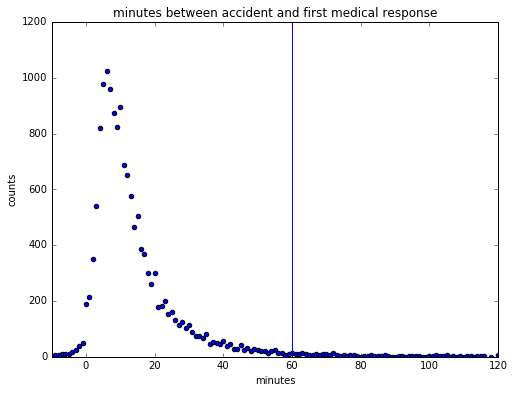

In [54]:
plt.scatter(minutes, counts)
plt.title("minutes between accident and first medical response")
plt.xlim((-10, 120))
plt.ylim((0, 1200))
plt.xlabel("minutes")
plt.ylabel("counts")

# The golden hour
plt.plot((60, 60), plt.ylim())

So it looks like emergency medical services typically made it to the scene within the first hour, with most responses occurring by 20 minutes.

I wonder if it was any different before cellphones were as popular?

In [25]:
def plot_response_time(fname = DATADIR + "2011/accident.dbf"):
    """
    Take the code we wrote interactively above and generalize it into a function.
    """
    responses = fars.all_responses(fname)
    counted = Counter(responses)
    del counted[-math.inf]

    minutes = list(counted.keys())
    counts = list(counted.values())

    plt.scatter(minutes, counts)
    plt.title(fname + ": minutes between accident and first medical response")
    plt.xlim((-10, 120))
    plt.ylim((0, max(counts) + 100))
    plt.xlabel("minutes")
    plt.ylabel("counts")

    # The golden hour
    plt.plot((60, 60), plt.ylim())

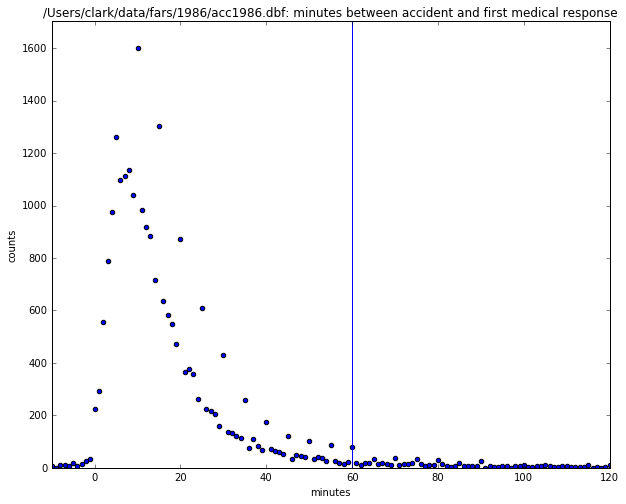

In [26]:
plot_response_time(DATADIR + "1986/acc1986.dbf")

Looks like more people rounded to the 5 minute mark in 1986.

## Exercise 3

Using the `Counter()` object, find out relatively how many responses were within the golden hour.

## Bonus

Make this plot for all the data since 1975, using a minimal amount of memory.

See `itertools.chain`.